In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # EDA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
day_df = pd.read_csv("../input/bike-sharing-dataset/day.csv")

In [ ]:
day_df.info()
day_df.describe()
day_df['cnt'].describe()

In [ ]:
corrDf = day_df.corr()
corrDf['cnt'].sort_values(ascending =False)

In [ ]:
# visualize certain facts
sns.pairplot(day_df.loc[:,["cnt","temp","mnth","weekday","weathersit"]])
plt.show()

In [ ]:
# get rid of the extreme casual/rigisted/cnt rows
day_NoOu = day_df[np.abs(day_df['casual']-day_df['casual'].mean())<=(3*day_df['casual'].std())] 
day_NoOu.shape

In [ ]:
dropFeatures = ['instant' , 'dteday' , 'season' , 'yr' , 'workingday' ,
                'windspeed' , 'atemp' , 'hum','casual','registered']
day_ready = day_NoOu.drop(dropFeatures , axis=1)

In [ ]:
day_ready.temp.plot(kind="hist",bins=50,figsize=(5,5))
plt.show()

In [ ]:
sns.jointplot(x="temp", y="cnt", data=day_ready, size=5)

In [ ]:
x1 = day_ready[['temp', 'cnt']].as_matrix()
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=10)
y1 = kms.fit_predict(x1)

In [ ]:
day_ready['temp']=y1

In [ ]:
# split to train data 70% and test data 30%
from sklearn.model_selection import train_test_split
train, test = train_test_split(day_ready, test_size = 0.3)

In [ ]:
X = train.loc[:,['mnth','holiday','weekday','weathersit','temp']]
y = train.loc[:,'cnt']
X_test = test.loc[:,['mnth','holiday','weekday','weathersit','temp']]

In [ ]:
model1 = RandomForestClassifier(n_estimators=1000)
model1.fit(X, y)
predicted1 = model1.predict(X_test)

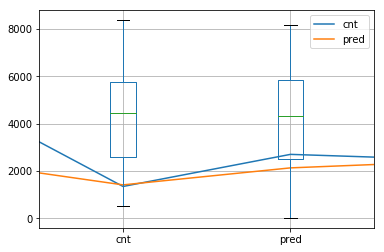

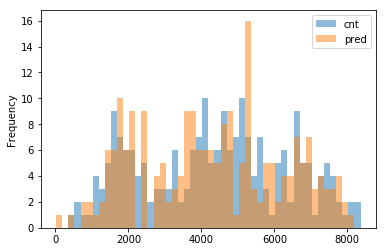

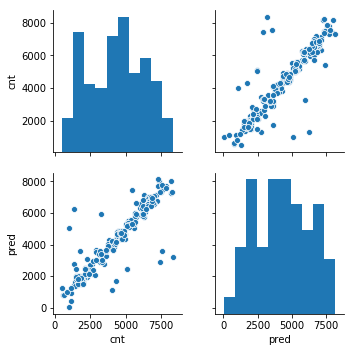

In [20]:
# compare RF prediction with test cases
from pandas import Series,DataFrame
res = DataFrame(test['cnt'])
res.insert(1,'pred',predicted1)
res.index = range(len(res)) #Reassignment the index
res.describe()
res.plot()
boxplot=res.boxplot()
res.plot.hist(alpha=0.5,bins=50)
sns.pairplot(res)